In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

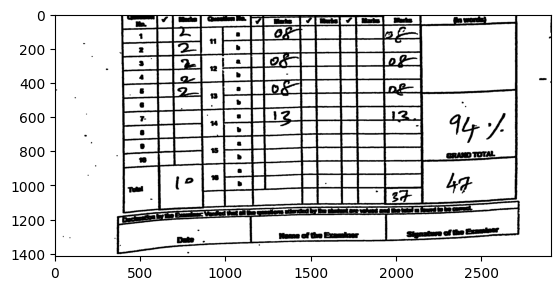

In [ ]:
img_for_box_extraction_path = "sheet3.jpg"
cropped_dir_path = r"/content/images"

img = cv2.imread(img_for_box_extraction_path, 0)
if img is not None:


    (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    if img_bin is not None:

        img_bin = 255 - img_bin
        cv2.imwrite(cropped_dir_path+"inverted_image.jpg", img_bin)

        v_kernel_length = max(1, np.array(img).shape[1] // 2000)
        h_kernel_length = max(1, np.array(img).shape[1] // 1000)

        verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, max(1, v_kernel_length)))
        #verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length))
        hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (max(1, h_kernel_length), 1))
        #hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1))

        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

        img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
        verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"verticle_lines.jpg", verticle_lines_img)

        img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
        horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
        cv2.imwrite(cropped_dir_path+"horizontal_lines.jpg", horizontal_lines_img)

        alpha = 0.5
        beta = 1.0- alpha

        img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
        img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
        (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        cv2.imwrite(cropped_dir_path+"img_final_bin.jpg", img_final_bin)

        plt.imshow(img_final_bin, cmap='gray')
        contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

206 75
207 74
206 73
210 72
206 72
208 73
206 72
206 73
206 72
206 73
210 72
204 74


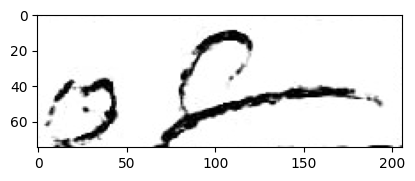

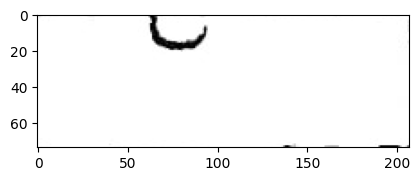

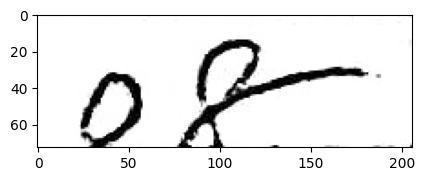

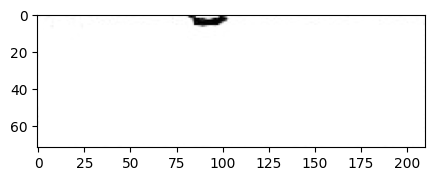

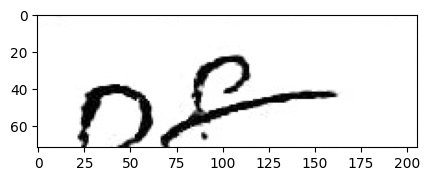

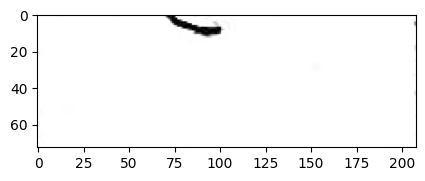

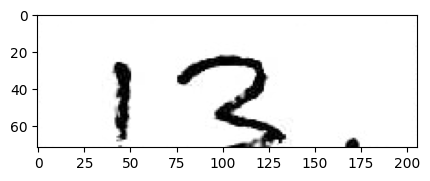

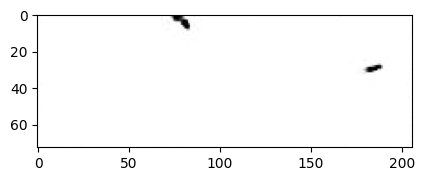

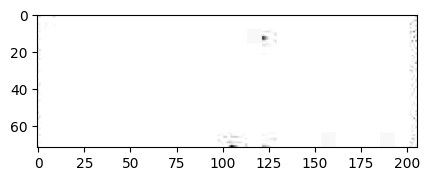

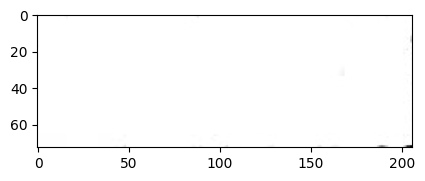

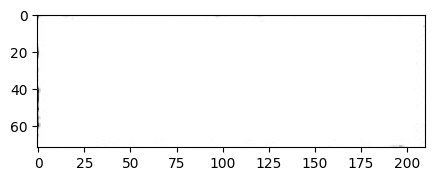

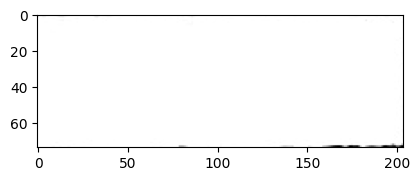

In [ ]:
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
idx=0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if ( 1800 < x and y>50 and 250>w>180 and 80>h>60 ):

        print(w , h)
        new_img = img[y:y+h, x:x+w]
        #cv2.imwrite("/content/images/"+ str(idx)+ ' '+ str(w)+" "+str(h) + '.jpg', new_img)
        cv2.imwrite(f"/content/images/{idx}_{w}_{h}.jpg", new_img)

        plt.figure(figsize=(40, 10))
        plt.subplot(5,2, 10)
        plt.imshow(new_img, cmap='gray')
        idx+=1


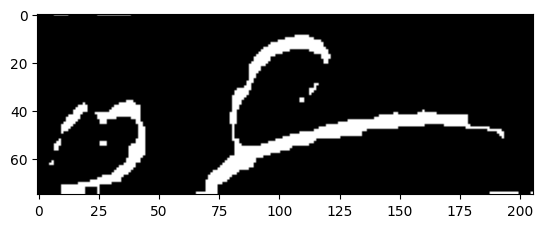

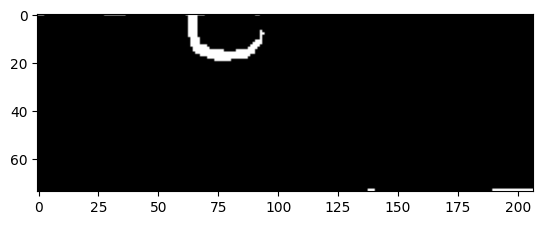

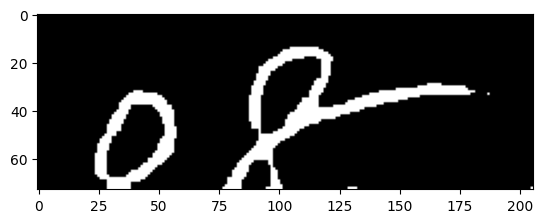

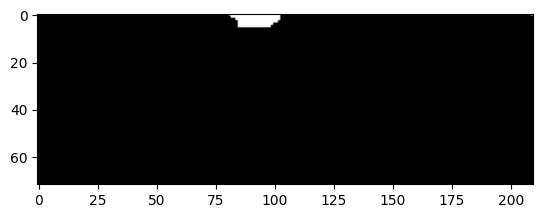

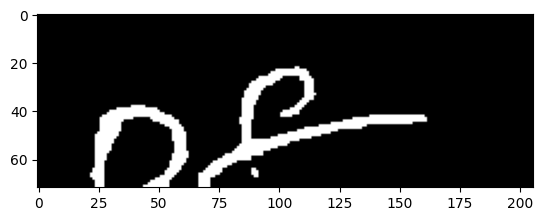

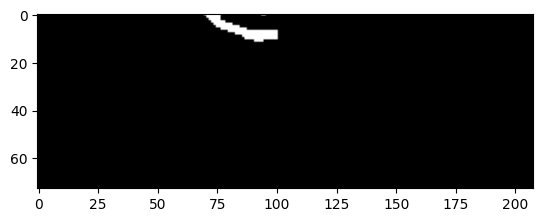

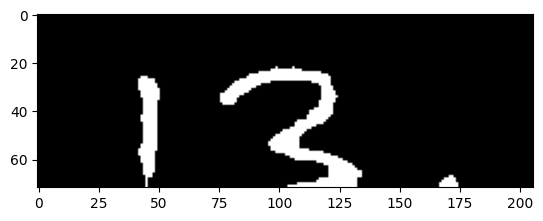

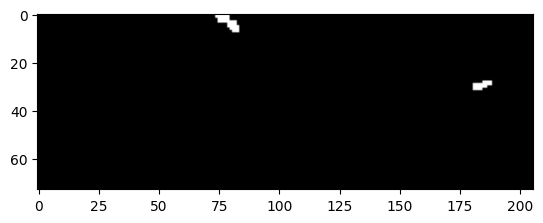

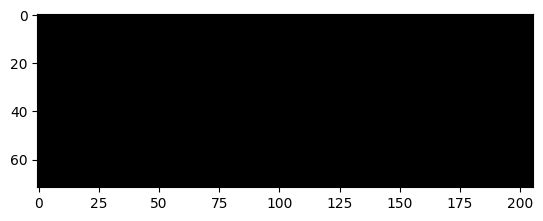

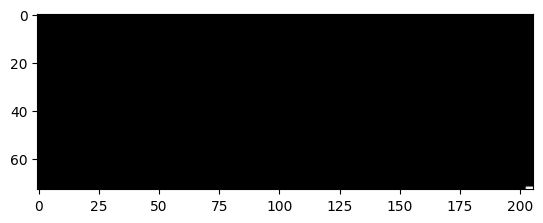

In [ ]:
import os
directory = "/content/images"

# Loop through each image in the directory
#for filename in os.listdir(directory):
    #if filename.endswith(".jpg"):
        # Read the image
        #image_path = os.path.join(directory, filename)
        #image = cv2.imread(image_path)
        #input_copy = image.copy()
        #org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #img_gray = cv2.threshold(org_image, 127, 255, cv2.THRESH_BINARY_INV)[1]
        #inverted_image = cv2.bitwise_not(img_gray)
        #kernel = np.ones((5, 5), np.uint8)
        #img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
        #img_morphex = cv2.bitwise_not(img_morphex)
        #plt.imshow(img_morphex, cmap='gray')
        #plt.show()




file_list = sorted([filename for filename in os.listdir(directory) if filename.endswith(".jpg")])

for filename in file_list:
    # Read the image
    image_path = os.path.join(directory, filename)
    image = cv2.imread(image_path)
    input_copy = image.copy()
    org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.threshold(org_image, 127, 255, cv2.THRESH_BINARY_INV)[1]
    inverted_image = cv2.bitwise_not(img_gray)
    kernel = np.ones((5, 5), np.uint8)
    img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
    img_morphex = cv2.bitwise_not(img_morphex)

    plt.imshow(img_morphex, cmap='gray')
    plt.show()


In [ ]:
contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
img_contours = np.zeros(image.shape)
image_copy=img_morphex.copy()

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
cv2_imshow(img_morphex)
cv2.waitKey(0)
cv2.destroyAllWindows()

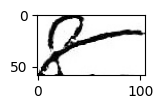

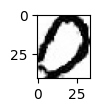

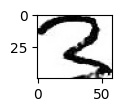

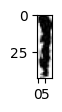

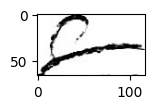

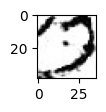

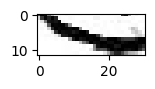

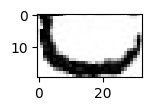

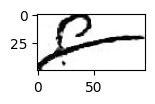

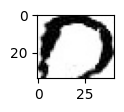

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab.patches import cv2_imshow


directory = "/content/images/"
i=0
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):

        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        input_copy = image.copy()
        org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


        img_gray = cv2.threshold(org_image, 150, 255, cv2.THRESH_BINARY_INV)[1]
        inverted_image = cv2.bitwise_not(img_gray)
        kernel = np.ones((3, 3), np.uint8)
        img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
        img_morphex = cv2.bitwise_not(img_morphex)


        #plt.imshow(img_morphex, cmap='gray')
        #plt.show()

        contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(image.shape)
        image_copy = img_morphex.copy()

        #cv2.drawContours(input_copy, contours, -1, (0, 255, 0), 3)
        #cv2_imshow(input_copy)

        contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
        for _, c in enumerate(contours):
            boundRect = cv2.boundingRect(c)

            rectX = boundRect[0]
            rectY = boundRect[1]
            rectWidth = boundRect[2]
            rectHeight = boundRect[3]

            rectArea = rectWidth * rectHeight

            minArea = 200
            if rectArea > minArea:
                i += 1
                color = (0, 255, 0)
                cv2.rectangle(input_copy, (int(rectX), int(rectY)),
                              (int(rectX + rectWidth), int(rectY + rectHeight)), color, 1)
                #cv2_imshow(input_copy)

                #if i > 1:
                    #plt.imshow(input_copy)
                    #plt.show()


                currentCrop = image[rectY:rectY + rectHeight, rectX:rectX + rectWidth]

                cv2.imwrite(f'/content/images/{i}.jpg', currentCrop)

                plt.subplot(5, 4, i)
                plt.imshow(currentCrop)
                plt.show()

        cv2.waitKey(0)
        cv2.destroyAllWindows()
